In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('titanic.csv') # como o arquivo ta na mesma pasta, nao precisa copiar o caminho

In [6]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df_backup = df.copy()

In [9]:
# contar dados nulos em cada coluna
nullColumns = df.isnull().sum()
print(nullColumns)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# contar dados nulos por linhas
nullLines = df.isnull().sum(axis=1)
print(nullLines)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64


In [11]:
# descrição dos dados
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# verificar as informações
infoDf = df.info()
print(infoDf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [13]:
# remover linhas duplicadas
df = df.drop_duplicates()

In [14]:
dfTeste = df.drop_duplicates(['PassengerId'])

In [15]:
def viewDuplicates(df):
    duplicates = df[df.duplicated(keep=False)]

    return duplicates

duplicatedLines = viewDuplicates(df)
print(duplicatedLines)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [16]:
# apagar colunas do df
df = df.drop(columns=['SibSp', 'Parch'])

In [17]:
dfTeste = df.dropna(subset=['Cabin'])

In [18]:
dfTeste.shape

(204, 10)

In [19]:
df = df.reset_index(drop=True)

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
df.rename(columns={
    'PassengerId':'IdPassageiro',
    'Survived': 'Sobreviveu',
    'Pclass': 'Classe',
    'Name': 'Nome',
    'Sex': 'Genero',
    'Age': 'Idade',
    'Ticket': 'Bilhete',
    'Fare': 'Tarifa',
    'Cabin': 'Cabine',
    'Embarked': 'Embarque'
}, inplace=True)

In [22]:
df.columns

Index(['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Genero', 'Idade',
       'Bilhete', 'Tarifa', 'Cabine', 'Embarque'],
      dtype='object')

In [23]:
# salvar no csv
df.to_csv('titanicTratado.csv', index=False)

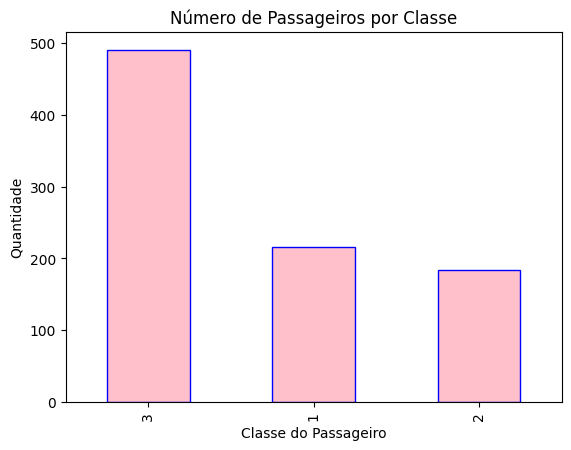

In [24]:
# Quantos passageiros estavam em cada classe do Titanic?

contagemPassageiros = df['Classe'].value_counts()

#criando o grafico
contagemPassageiros.plot(kind='bar', edgecolor='blue', color='pink')

#configurações
plt.xlabel('Classe do Passageiro')
plt.ylabel('Quantidade')
plt.title('Número de Passageiros por Classe')

plt.show()



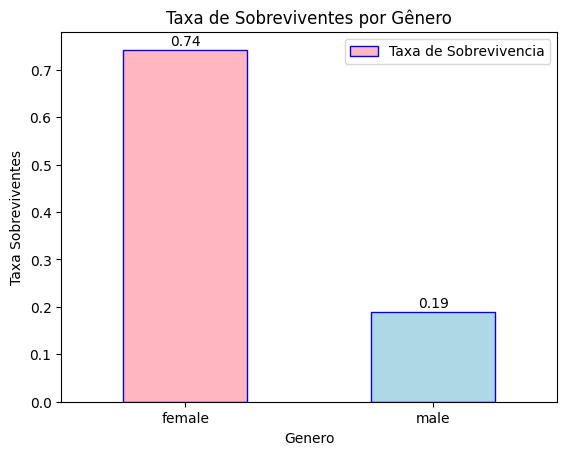

In [26]:
# Qual é a taxa de sobreviventes por genero?

# Agrupamento de Genero por Sobreviventes
taxaSobrevGenero = df.groupby('Genero')['Sobreviveu'].mean()

# cores para barras
cores = ['lightpink', 'lightblue']

#plotagem
barras = taxaSobrevGenero.plot.bar(edgecolor='blue', color=cores)

# Os rotulos
plt.xlabel('Genero')
plt.xticks(rotation=0) # colocando o rotulo do eixo X deitado
plt.ylabel('Taxa Sobreviventes')
plt.title('Taxa de Sobreviventes por Gênero')
plt.legend(['Taxa de Sobrevivencia'])

# Adicionar rótulos nos graficos
for i, v in enumerate(taxaSobrevGenero):
    barras.text(i, v + 0.01, f'{v:.2f}', color='black', ha='center')


plt.show()



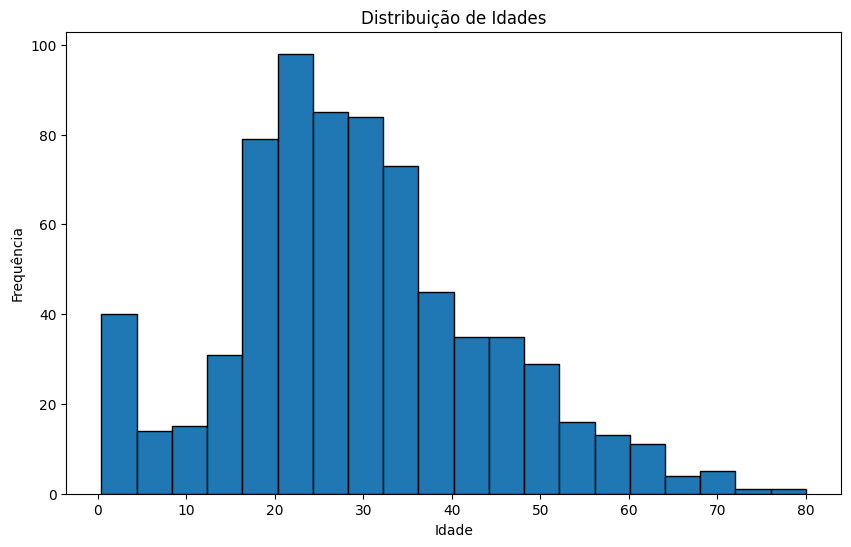

In [38]:
## Distribuição por idade

plt.figure(figsize=(10, 6))
plt.hist(df['Idade'], bins=20, edgecolor='black')
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

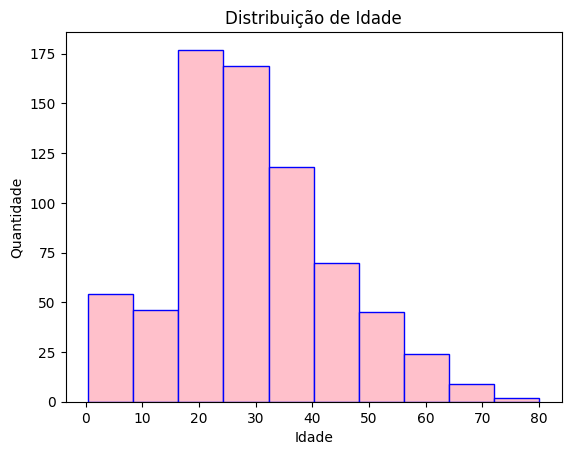

In [40]:
#Qual é a distribuição de idades? versao da prof
#plotagem
df["Idade"].plot.hist(bins=10, edgecolor= "blue", color="pink")
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Distribuição de Idade")
plt.show()

## Teste de hipótese
Teste de Classe e SobrevivênciaHipótese Nula H0: Os sobreviventes não dependem da classe dos passageiros \
Hipótese Alternativa H1: Os sobreviventes dependem da classe


In [54]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install seaborn

In [56]:
from scipy.stats import ttest_ind
import seaborn as sns

Teste T de idade
Estatística T : -2.06668694625381
Valor P: 0.03912465401348249


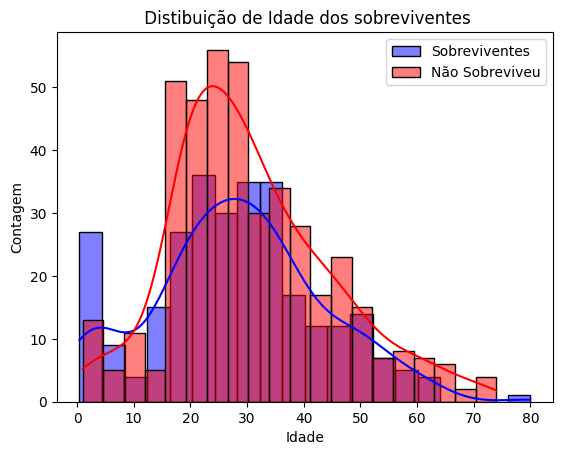

Rejeitamos a hipótese nula


In [60]:
#amostras
idade_sobriventes = df[df['Sobreviveu']== 1]['Idade'].dropna()
idade_nao_sobreviveu = df[df['Sobreviveu']==0]['Idade'].dropna()


# Teste t
estatistica_t, valor_p = ttest_ind(idade_sobriventes, idade_nao_sobreviveu)

print("Teste T de idade")
print(f"Estatística T : {estatistica_t}")
print(f"Valor P: {valor_p}")


#grafico
sns.histplot(idade_sobriventes, color= 'blue', label ='Sobreviventes', kde=True, bins= 20)
sns.histplot(idade_nao_sobreviveu, color = 'red', label = 'Não Sobreviveu', kde=True, bins= 20)


#rotulos
plt.legend()
plt.title(" Distibuição de Idade dos sobreviventes")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()


#interpretação
if valor_p < 0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

In [61]:
df.head(3)

,IdPassageiro,Sobreviveu,Classe,Nome,Genero,Idade,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S


### Amostra e SQL

In [62]:
#amostra
babyDf = df.sample(100)

In [64]:
babyDf.head(3)

,IdPassageiro,Sobreviveu,Classe,Nome,Genero,Idade,Bilhete,Tarifa,Cabine,Embarque
128,129,1,3,"Peter, Miss. Anna",female,NaN,2668,22.3583,F E69,C
681,682,1,1,"Hassab, Mr. Hammad",male,27.0,PC 17572,76.7292,D49,C
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,C.A. 29395,10.5000,F33,S


In [65]:
import sqlite3

In [67]:
#conexão
conn = sqlite3.connect(':memory:')

#escrever o df em um sql
babyDf.to_sql('babyDf', conn, index=False, if_exists='replace')

#executar a consulta
query_sql = """
SELECT Genero, COUNT(IdPassageiro) AS Contagem
FROM babyDf
GROUP BY Genero;
"""

contagemGenero = pd.read_sql_query(query_sql, conn)
print(contagemGenero)

#fechar a conexão
conn.close()

   Genero  Contagem
0  female        47
1    male        53


In [68]:
contagemGenero2 = babyDf['Genero'].value_counts()
contagemGenero2.columns = ['Genero', 'Contagem']
print(contagemGenero2)

Genero
male      53
female    47
Name: count, dtype: int64
